In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def random_MixtureGaussian(N, P, m, S, cl):
    d = m.shape[1]
    c = m.shape[0]
    z = np.random.choice(np.arange(0,c), N, p=P)
    X = np.ones([1,d])
    for i in range(0,c):
        n = np.sum(z == np.array([i]*N))
        x = np.random.multivariate_normal(m[i], S[i], n)
        X = np.concatenate([X, x])
    X = X[1:]
    Y = cl*np.array(N*[1])
    return X, Y

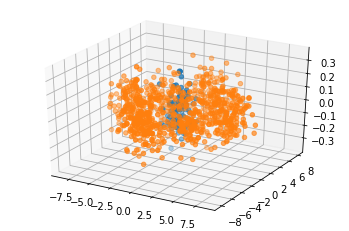

In [2]:
a = 6
m0 = np.array([[0, 0, 0]])
m1 = np.array([[a, 0, 0]])
m2 = np.array([[a/2, a/2, 0]])
m3 = np.array([[0, a, 0]])
m4 = np.array([[-a/2, a/2, 0]])
m5 = np.array([[-a, 0, 0]])
m6 = np.array([[-a/2, -a/2, 0]])
m7 = np.array([[0, -a, 0]])
m8 = np.array([[a/2, -a/2, 0]])
S1 = np.array([[[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]]])
S2 = np.array([[[1, 0, 0], [0, 1, 0], [0, 0, 0.01]]])
P = np.array([1])
N = 100


X1, Y1 = random_MixtureGaussian(N, P, m0, S1, 0)
X2, Y2 = random_MixtureGaussian(N, P, m1, S2, 1)
X3, Y3 = random_MixtureGaussian(N, P, m2, S2, 1)
X4, Y4 = random_MixtureGaussian(N, P, m3, S2, 1)
X5, Y5 = random_MixtureGaussian(N, P, m4, S2, 1)
X6, Y6 = random_MixtureGaussian(N, P, m5, S2, 1)
X7, Y7 = random_MixtureGaussian(N, P, m6, S2, 1)
X8, Y8 = random_MixtureGaussian(N, P, m7, S2, 1)
X9, Y9 = random_MixtureGaussian(N, P, m8, S2, 1)

X2 = np.concatenate([X2, X3, X4, X5, X6, X7, X8, X9])
Y2 = np.concatenate([Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9])
X_train = np.concatenate([X1, X2])
Y_train = np.concatenate([Y1, Y2])



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2])
ax.scatter(X2[:,0], X2[:,1], X2[:,2])

plt.show()

[5.42101086e-20 3.78961845e-04 2.79596689e-04]


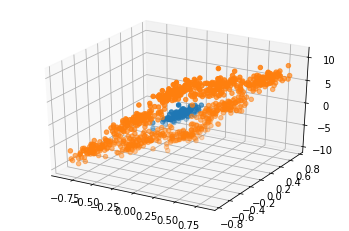

In [3]:
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
m = np.mean(X_train, axis=0)
S1 = np.cov(X1.T)
S2 = np.cov(X2.T)
Sb = 1/2*np.dot((m1-m0).T, (m1-m0)) + 1/2*np.dot((m2-m0).T, (m2-m0))
Sw = 1/2*(S1+S2)
[V, D] = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))
print(V)
X1T = np.dot(X1, D.T)
X2T = np.dot(X2, D.T)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1T[:,0], X1T[:,1], X1T[:,2])
ax.scatter(X2T[:,0], X2T[:,1], X2T[:,2])
plt.show()

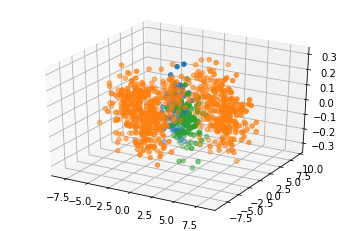

In [4]:
a = 6
m0 = np.array([[0, 0, 0]])
m1 = np.array([[a, 0, 0]])
m2 = np.array([[a/2, a/2, 0]])
m3 = np.array([[0, a, 0]])
m4 = np.array([[-a/2, a/2, 0]])
m5 = np.array([[-a, 0, 0]])
m6 = np.array([[-a/2, -a/2, 0]])
m7 = np.array([[0, -a, 0]])
m8 = np.array([[a/2, -a/2, 0]])
S1 = np.array([[[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]]])
S2 = np.array([[[1, 0, 0], [0, 1, 0], [0, 0, 0.01]]])
P = np.array([1])
N = 100


X1, Y1 = random_MixtureGaussian(N, P, m0, S1, 0)
X2, Y2 = random_MixtureGaussian(N, P, m1, S2, 1)
X3, Y3 = random_MixtureGaussian(N, P, m2, S2, 1)
X4, Y4 = random_MixtureGaussian(N, P, m3, S2, 1)
X5, Y5 = random_MixtureGaussian(N, P, m4, S2, 1)
X6, Y6 = random_MixtureGaussian(N, P, m5, S2, 1)
X7, Y7 = random_MixtureGaussian(N, P, m6, S2, 1)
X8, Y8 = random_MixtureGaussian(N, P, m7, S2, 2)
X9, Y9 = random_MixtureGaussian(N, P, m8, S2, 2)

X2 = np.concatenate([X2, X3, X4, X5, X6, X7, X8])
Y2 = np.concatenate([Y2, Y3, Y4, Y5, Y6, Y7, Y8])
X3 = X9
Y3 = Y9
X_train = np.concatenate([X1, X2, X3])
Y_train = np.concatenate([Y1, Y2, Y3])



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2])
ax.scatter(X2[:,0], X2[:,1], X2[:,2])
ax.scatter(X3[:,0], X3[:,1], X3[:,2])
plt.show()

[1.17026212e+00 5.56874813e-04 1.16467701e-04]


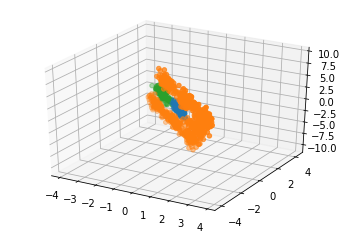

In [5]:
m1 = np.mean(X1, axis=0)
m2 = np.mean(X2, axis=0)
m3 = np.mean(X3, axis=0)
m = np.mean(X_train, axis=0)
S1 = np.cov(X1.T)
S2 = np.cov(X2.T)
S3 = np.cov(X3.T)
Sb = 1/3*np.dot((m1-m0).T, (m1-m0)) + 1/3*np.dot((m2-m0).T, (m2-m0)) + 1/3*np.dot((m3-m0).T, (m3-m0))
Sw = 1/3*(S1+S2+S3)
[V, D] = np.linalg.eig(np.dot(np.linalg.inv(Sw), Sb))
print(V)
X1T = np.dot(X1, D.T)
X2T = np.dot(X2, D.T)
X3T = np.dot(X3, D.T)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1T[:,0], X1T[:,1], X1T[:,2])
ax.scatter(X2T[:,0], X2T[:,1], X2T[:,2])
ax.scatter(X3T[:,0], X3T[:,1], X3T[:,2])
plt.show()